# ELEC 400M / EECE 571M Assignment 3: Clustering
(Again, this assignment drew inspiration from an assignment used in ECE 421 at the University of Toronto and kindly made available to us by the instructor; as well as from the problem set in our textbook Learning from Data.)

In this assignment, you will implement and test methods for clustering that we have discussed in the course.

## Data Sets

You will be working with two data sets:
- data2D.npy
- data100D.npy

Each of the data sets has 10,000 data points, which are 2-dimensional and 100-dimensional, respectively.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


## K-Means algorithm [18 marks]

You will first implement and test the K-means algorithm. 

### Implement the functions [5 marks]

For this, you will only use functions from the NumPy library. You will implement four functions to realize the K-Means algorithm.

- `distanceFunc`: This function accepts your data and cluster centers and returns the squared pairwise distances between data points and cluster centers. 
- `KMinit`: This function accepts your data and returns the initial cluster centres. You will use the "greedy approach" described on page 6-16 in the textbook, but instead of a randomly selected data point always pick the first entry in the data set as the first center. 
- `lossFunc`: This function accepts the squared pairwise distances between data points and cluster centers and returns the sum of cluster errors as defined in (6.5) in the textbook. 
- `KMmeans`: This function implements the K-Means algorithm as described in the textbook. It returns the cluster centers and the sum of cluster errors as defined in (6.5) in the textbook. 

In [2]:
import operator

def distanceFunc(x, mu):
    # Inputs  
    # x: is an NxD data matrix (N observations and D dimensions)
    # mu: is an KxD cluster center matrix (K cluster centers and D dimensions)
    # Output
    # pair_dist2: is the NxK matrix of squared pairwise distances
    # --------------------------------------
    
    #euclidian distances
    pair_dist2 = np.linalg.norm((x - mu))

    return pair_dist2

In [3]:
import operator

def KMinit(x, K):
    # Inputs
    # x: is an NxD data matrix 
    # K: number of clusters
    # Output
    # mu: is the KxD matrix of initial cluster centers using the "greedy approach" described on page 6-16 in the textbook. 
    # Remark: Always pick the first entry in the data set as the first center. 
    #-------------------------------------------
    
    #return the centroid matrix, all the data points up until K (the amount of clusters needed)
    
    #initialize mu; copy x to modify
    mu = list([x.copy()[0]])
    x_copy = x.copy()
    
    for m in range(1, K):
        
        #initialize index and nearest point list
        nearest_point = []
        x_ind = 0
        
        #iterate through x
        for n in x_copy:
            
            #distance array init; increment indices
            dist_arr = []
            x_ind += 1
            
            #iterate through mu
            for o in mu:
                
                dist_arr.append((distanceFunc(n,o), n, x_ind))

            dist_arr.sort(key = operator.itemgetter(0))
            
            if(len(nearest_point) == 0):
                nearest_point.append(dist_arr[0])

            for p in (nearest_point):
                pt_exists = 1 if ( (dist_arr[0][0] - n[0]) == 0 ) else 0
            
            if(pt_exists == 0):
                nearest_point.append(dist_arr[0])
        
        nearest_point.sort(reverse = True, key = operator.itemgetter(0))
        
        #append to mu list
        mu.append(nearest_point[0][1])
        
        #delete from x copy
        x_copy = np.delete(x_copy, nearest_point[0][2] - 1, axis = 0)
                
    return mu

In [4]:
def lossFunc(pair_dist2):
    # Input 
    # pair_dist2: is an NxK matrix of squared pairwise distances
    # Output
    # loss: error as defined in (6.5) in the textbook
    # --------------------------------------

    loss = np.sum(pair_dist2)
    
    return loss

In [5]:
import operator

def Kmeans(x,K):
    # Inputs
    # x: is an NxD data matrix 
    # K: number of clusters
    # Outputs
    # mu: is the KxD of cluster centers  
    # loss: error as defined in (6.5) in the textbook 
    # --------------------------------------
    
    #returns the cluster centers and the sum of cluster errors as defined in (6.5) textbook
    
    #initialize centroids
    mu = KMinit(x, K)
    
    dim = x[0].shape[0]
    #loop until loss is minimized
    while True:
        
        #init lists
        clusters = [[] for k in range(K)]
        dist_arr = [[] for k in range(K)]
        
        cluster_ind = []
        
        for X in x: 
            
            c_list = []
            
            #make call to dist function
            for i in range(len(mu)):
                c_list.append(distanceFunc(X, mu[i]))
                
            c = c_list.index(min(c_list))
            dist_arr[c].append(c_list[c])
            
            #append cluster list
            clusters[c].append(X)
            cluster_ind.append(c)
            
        #calculate loss
        loss = np.sum([lossFunc(dist_arr[k]) for k in range(K)])
        
        #calculate new centroid
        centroid_new = [([np.mean(np.asarray(clusters[k])[:,d]) for d in range(dim)])
                          for k in range(K)]
        
        #store vars
        sorted_centroid = centroid_new
        save_centroid = centroid_new
        
        centroid_new = np.asarray(centroid_new) #make arr
                
        sorted_centroid.sort(key = lambda x : x[1])
        sorted_centroid = np.asarray(sorted_centroid) #make arr
        
        #store mu
        sorted_mu = mu
        mu = np.asarray(mu) #make arr

        sorted_mu.sort(key = lambda x : x[1])
        sorted_mu = np.asarray(sorted_mu) #make arr
        
        #calculate error to break loop or not using distance funct
        error = np.mean([distanceFunc(sorted_mu[k], sorted_centroid[k]) for k in range(K)])
        
        #loop until no error -> use instead of set iters
        if (np.absolute(error) < 10**-7).all():
            break
        
        #assign mu
        mu = save_centroid
    
    #return mu, clusters_index for plotting, and loss
    return mu, cluster_ind, loss
    

### Test the functions [5 marks]

Develop toy-sized test cases (create your own very small data set(s)) for all four functions and verify the correct operation. 

Use the code cell below to program the test cases and to print and/or plot the results as appropriate. 

Use the text cell below to describe your test cases and comment on the results.

For Test 1: Loss = 268.5233564357682
For Test 2: Loss = 179.46638836568275
For Test 3: Loss = 188.58271873503702


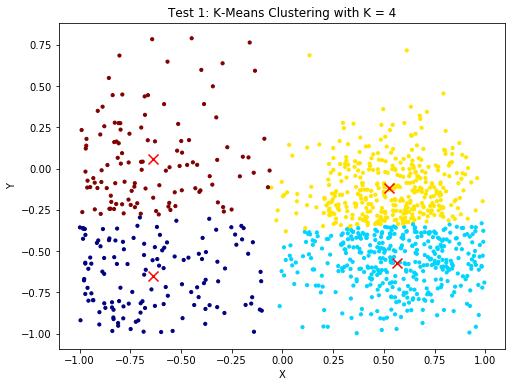

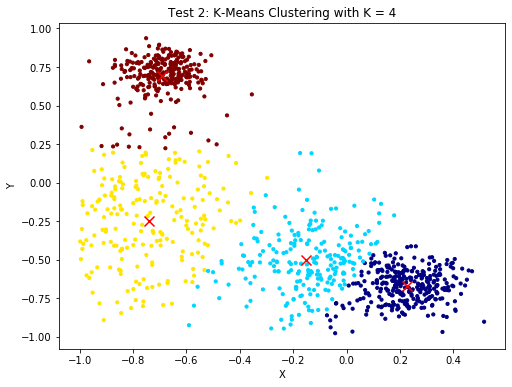

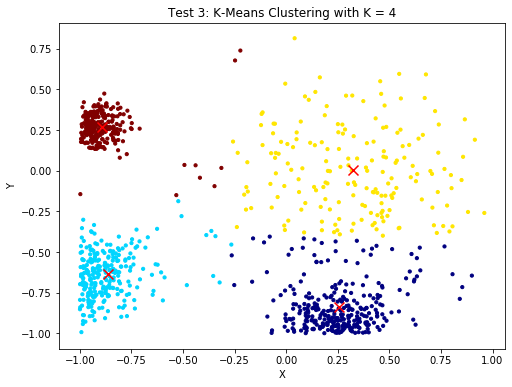

Run Time: 0.09007912079493205 mins 


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

#helper function to create toy data set
#reference: datasciencelab.wordpress.com
def init_board_gauss(N, k):
    n = float(N)/k
    X = []
    for i in range(k):
        c = (random.uniform(-1, 1), random.uniform(-1, 1))
        s = random.uniform(0.05,0.5)
        x = []
        while len(x) < n:
            a, b = np.array([np.random.normal(c[0], s), np.random.normal(c[1], s)])
            # Continue drawing points from the distribution in the range [-1,1]
            if abs(a) < 1 and abs(b) < 1:
                x.append([a,b])
        X.extend(x)
    X = np.array(X)[:N]
    return X

#time start
time_start = time.time()

#load real data
#data = np.load('data2D.npy')

#----------------------------------------------------

#K parameter for adjustments and testing
K = 4

#random test datasets
#data = np.random.rand(200, 2)
#3n1 = 1000
#n2 = 4000
#n3 = 7000

n1 = 1000
n2 = 1000
n3 = 1000

#initialize random cluster data sets
datatest1 = init_board_gauss(n1,K)
datatest2 = init_board_gauss(n2,K)
datatest3 = init_board_gauss(n3,K)

#test function call
mut1, clusterst1, losst1 = Kmeans(datatest1, K)
mut2, clusterst2, losst2 = Kmeans(datatest2, K)
mut3, clusterst3, losst3 = Kmeans(datatest3, K)

#convert to array
mut1 = np.asarray(mut1)
mut2 = np.asarray(mut2)
mut3 = np.asarray(mut3)

#TEST OUTPUT --------------------------------------
print("For Test 1: Loss = {}".format((losst1)))
print("For Test 2: Loss = {}".format((losst2)))
print("For Test 3: Loss = {}".format((losst3)))

#PLOTTING -----------------------------------------

#CASE 1
plt.figure(figsize=(8, 6))
#plot data
plt.scatter(x = datatest1[:, 0], y = datatest1[:, 1], s = 10, c = clusterst1, cmap = 'jet')
#plot centroids
plt.scatter(x = mut1[:, 0], y = mut1[:, 1], s = 100, c='red', marker='x');
#graph details
plt.title('Test 1: K-Means Clustering with K = '+ str(K))
plt.xlabel('X')
plt.ylabel('Y')

#CASE 2
plt.figure(figsize=(8, 6))
#plot data
plt.scatter(x = datatest2[:, 0], y = datatest2[:, 1], s = 10, c = clusterst2, cmap = 'jet')
#plot centroids
plt.scatter(x = mut2[:, 0], y = mut2[:, 1], s = 100, c='red', marker='x');
#graph details
plt.title('Test 2: K-Means Clustering with K = '+ str(K))
plt.xlabel('X')
plt.ylabel('Y')

#CASE 3
plt.figure(figsize=(8, 6))
#plot data
plt.scatter(x = datatest3[:, 0], y = datatest3[:, 1], s = 10, c = clusterst3, cmap = 'jet')
#plot centroids
plt.scatter(x = mut3[:, 0], y = mut3[:, 1], s = 100, c='red', marker='x');
#graph details
plt.title('Test 3: K-Means Clustering with K = '+ str(K))
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

#time stop
time_stop = time.time()
print("Run Time: {} mins ".format((time_stop - time_start) / 60))


ANSWER:

For evaluating the K-Means algorithm, we can look at the different centroids and how they shift compared to various data sets and different amounts of points. After the algorithm runs, we can then analyze the amount of loss resulting from the clustering. 

For my test cases, I developed 3 randomly clustered data sets and tested the various amounts of clusters (K = 1 to 5). The centroids fit the variety of data sets well, with reasonable amounts of loss respective to the associated K value and amount of points. 

The ability for the algorithm to adapt to different data while maintaining a similar magnitude of loss when operating with the same sized data set (in the example above, all data sets are K = 4 and n = 1000) shows that the K-Means algorithm is functioning and passes the testing.

Example test data:

K = 4, n = 1000

For Test 1: Loss = 268.5233564357682

For Test 2: Loss = 179.46638836568275

For Test 3: Loss = 188.58271873503702

It can be seen that for 3 completely different toy data sets, the tested algorithm adapts and still results with similarly low error.

### Run K-Means on 2D data set [4]

Implement a script that runs the K-Means algorithm (using the functions above) with $K = 1, 2, 3, 4, 5$ for the data set data2D.npy.  

The script should produce the following plots:
- for each of these values of $K$, a 2D scatter plot of the data points colored by their cluster assignments plus the cluster centers
- the K-means loss as a function of $K$

For K = 1
Loss: 18677.826945817906
For K = 2
Loss: 7939.074033585664
For K = 3
Loss: 5179.479871629681
For K = 4
Loss: 4484.770069515282
For K = 5
Loss: 4151.1024326555


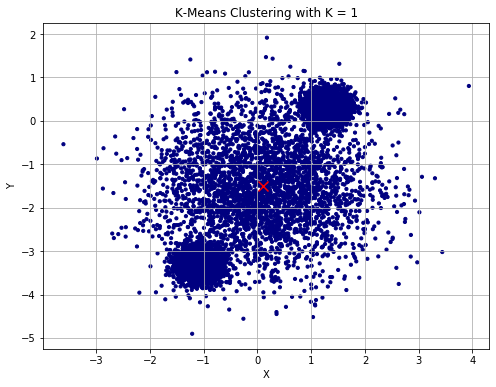

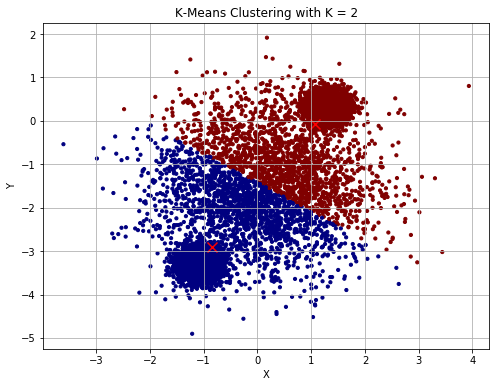

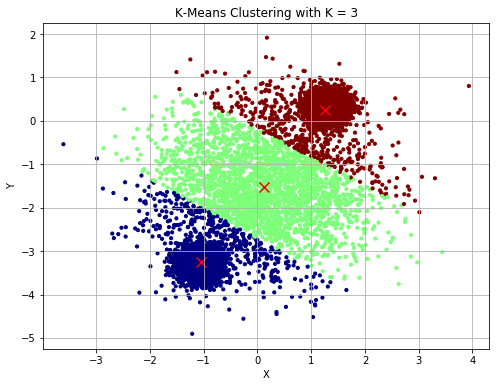

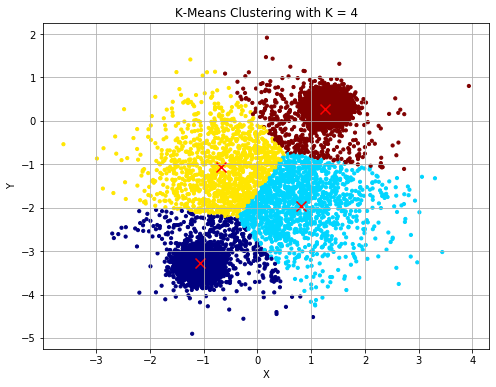

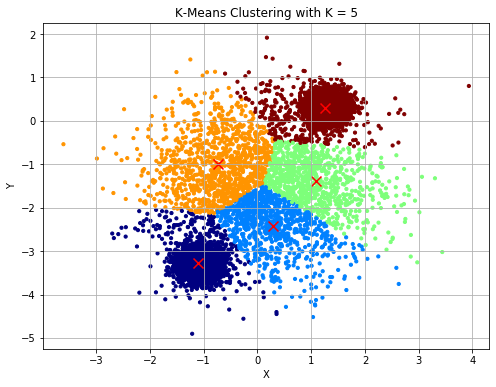

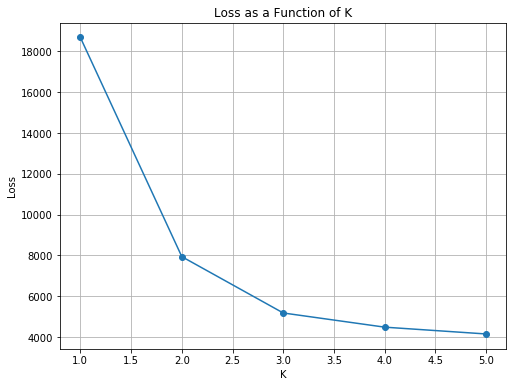

Run Time: 13.947126758098602 mins 


In [12]:
#plot K = 1, 2, 3, 4, 5
import numpy as np
import matplotlib.pyplot as plt
import time

#time start
time_start = time.time()

#load data
data = np.load('data2D.npy')

#K parameter for adjustments and testing
K1 = 1
K2 = 2
K3 = 3
K4 = 4
K5 = 5

#KMEANS ------------------------------------------
# K = 1
mu1, clusters1, losses1 = Kmeans(data, K1)
mu1 = np.asarray(mu1)

# K = 2
mu2, clusters2, losses2 = Kmeans(data, K2)
mu2 = np.asarray(mu2)

# K = 3
mu3, clusters3, losses3 = Kmeans(data, K3)
mu3 = np.asarray(mu3)

# K = 4
mu4, clusters4, losses4 = Kmeans(data, K4)
mu4 = np.asarray(mu4)

# K = 5
mu5, clusters5, losses5 = Kmeans(data, K5)
mu5 = np.asarray(mu5)

#TEST OUTPUT --------------------------------------
print("For K = {}".format((K1)))
print("Loss: {}".format((losses1)))

print("For K = {}".format((K2)))
print("Loss: {}".format((losses2)))

print("For K = {}".format((K3)))
print("Loss: {}".format((losses3)))

print("For K = {}".format((K4)))
print("Loss: {}".format((losses4)))

print("For K = {}".format((K5)))
print("Loss: {}".format((losses5)))

#PLOTTING -----------------------------------------
#K=1 ----------------------
plt.figure(figsize=(8, 6))
#plot data
plt.scatter(x = data[:, 0], y = data[:, 1], s = 10, c = clusters1, cmap = 'jet')
#plot centroids
plt.scatter(x = mu1[:, 0], y = mu1[:, 1], s = 100, c='red', marker='x');
plt.title('K-Means Clustering with K = '+ str(K1))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

#K=2 ----------------------
plt.figure(figsize=(8, 6))
#plot data
plt.scatter(x = data[:, 0], y = data[:, 1], s = 10, c = clusters2, cmap = 'jet')
#plot centroids
plt.scatter(x = mu2[:, 0], y = mu2[:, 1], s = 100, c='red', marker='x');
plt.title('K-Means Clustering with K = '+ str(K2))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

#K=3 ----------------------
plt.figure(figsize=(8, 6))
#plot data
plt.scatter(x = data[:, 0], y = data[:, 1], s = 10, c = clusters3, cmap = 'jet')
#plot centroids
plt.scatter(x = mu3[:, 0], y = mu3[:, 1], s = 100, c='red', marker='x');
plt.title('K-Means Clustering with K = '+ str(K3))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

#K=4 ----------------------
plt.figure(figsize=(8, 6))
#plot data
plt.scatter(x = data[:, 0], y = data[:, 1], s = 10, c = clusters4, cmap = 'jet')
#plot centroids
plt.scatter(x = mu4[:, 0], y = mu4[:, 1], s = 100, c='red', marker='x');
plt.title('K-Means Clustering with K = '+ str(K4))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

#K=5 ----------------------
plt.figure(figsize=(8, 6))
#plot data
plt.scatter(x = data[:, 0], y = data[:, 1], s = 10, c = clusters5, cmap = 'jet')
#plot centroids
plt.scatter(x = mu5[:, 0], y = mu5[:, 1], s = 100, c='red', marker='x');
plt.title('K-Means Clustering with K = '+ str(K5))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

#LOSS PLOT ----------------------
plt.figure(figsize=(8, 6))
#plot data
lossfunct = np.array([(1,losses1), (2,losses2), (3,losses3), (4,losses4), (5,losses5)])
plt.plot(lossfunct[:,0],lossfunct[:,1], '-o')
plt.title('Loss as a Function of K')
plt.xlabel('K')
plt.ylabel('Loss')
plt.grid()
plt.show()

time_stop = time.time()
print("Run Time: {} mins ".format((time_stop - time_start) / 60))



Discuss below on how many clusters you think is "best" and why? 

ANSWER:

Note: when running the above code block, it takes about 13 to 20 minutes to complete.

The amount of clusters that is "best" is the one that has the least amount of loss or error on this particular data set. K = 5 quantiatively has the least amount of error, but not drastically less when compared to K = 3 or K = 4. The biggest drop in error (excluding K = 1 to K = 2) occurs from K = 2 to K = 3. Depends on availability of computation time, the "best" amount of clusters can be K = 4 or K = 5, with K = 5 having the least amount of error. For efficiency, K = 3 would be the most appropriate. This also corresponds with the "elbow method", which will be discussed further in this assignment with how it applies to K-Means.

Loss calculations:

For K = 1: Loss = 18677.826945817906

For K = 2: Loss = 7939.074033585664

For K = 3: Loss = 5179.479871629681

For K = 4: Loss = 4484.770069515282

For K = 5: Loss = 4151.1024326555

### Explore Gap statistics [4]

Implement a script which does the following (using the functions implemented above).
Generate benchmark random data of the same size as the 2D data set, uniformly over the smallest axis-aligned square containing the actual data. Run the K-Means algorithm on this random data for $K=1,2,3,4,5$. Repeat for 10 such random data sets to obtain the average K-Means error, $E_{in}^{rand}(K)$ as a function of $K$. Plot the average K-Means error and the "gap statistic" 
$$G(K)=\log \left[E_{in}^{rand}(K)\right]-\log \left[E_{in}(K)\right]$$
as functions of $K$, where $E_{in}(K)$ is the K-Means error for the data set data2D.npy obtained above.

Retain the initialization of the random generator as provided below.

Data Sample 0 (Original Data):
K =  1
K =  2
K =  3
K =  4
K =  5
Data Sample 1:
K =  1
K =  2
K =  3
K =  4
K =  5
Data Sample 2:
K =  1
K =  2
K =  3
K =  4
K =  5
Data Sample 3:
K =  1
K =  2
K =  3
K =  4
K =  5
Data Sample 4:
K =  1
K =  2
K =  3
K =  4
K =  5
Data Sample 5:
K =  1
K =  2
K =  3
K =  4
K =  5
Data Sample 6:
K =  1
K =  2
K =  3
K =  4
K =  5
Data Sample 7:
K =  1
K =  2
K =  3
K =  4
K =  5
Data Sample 8:
K =  1
K =  2
K =  3
K =  4
K =  5
Data Sample 9:
K =  1
K =  2
K =  3
K =  4
K =  5
Data Sample 10:
K =  1
K =  2
K =  3
K =  4
K =  5


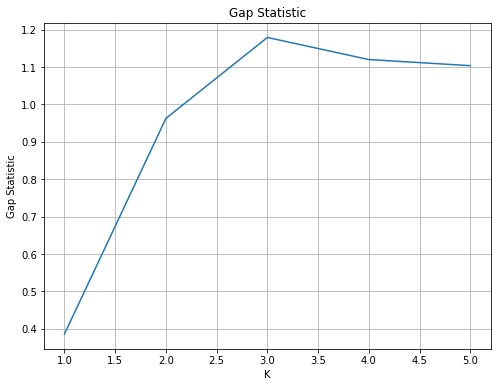

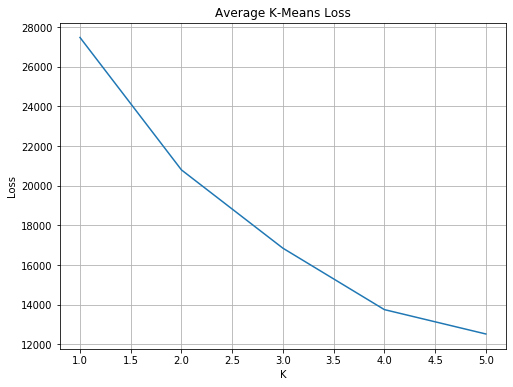

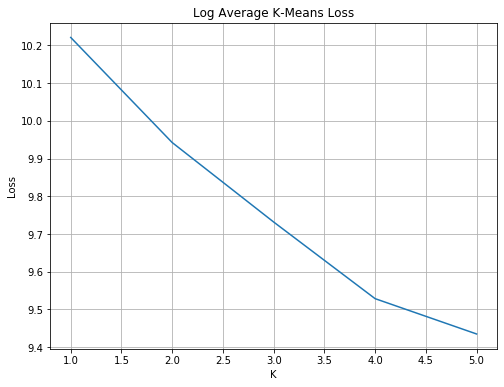

Run Time: 83.67651807864507 mins 


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

#don't change this
np.random.seed(421)

time_start = time.time()

#load the data
data = np.load('data2D.npy')

#generate random benchmark data of the same size as 2D dataset
#bounding box helper function
def bounding_box(data):
    x_min, x_max = min(data, key=lambda a:a[0])[0], max(data, key=lambda a:a[0])[0]
    y_min, y_max = min(data, key=lambda a:a[1])[1], max(data, key=lambda a:a[1])[1]
    return (x_min,x_max), (y_min,y_max)

(xmin, xmax), (ymin, ymax) = bounding_box(data)

#10 random datasets of size data2D
N = len(data)

#create 10 random datasets -----------

#dataset 1
xb = []
for n in range(N):
    xb.append([random.uniform(xmin, xmax), random.uniform(ymin, ymax)])
    random.uniform(y_min, y_max)
dataset1 = np.array(xb)

#dataset 2
xb = []
for n in range(N):
    xb.append([random.uniform(xmin, xmax), random.uniform(ymin, ymax)])
    random.uniform(y_min, y_max)
dataset2 = np.array(xb)

#dataset 3
xb = []
for n in range(N):
    xb.append([random.uniform(xmin, xmax), random.uniform(ymin, ymax)])
    random.uniform(y_min, y_max)
dataset3 = np.array(xb)

#dataset 4
xb = []
for n in range(N):
    xb.append([random.uniform(xmin, xmax), random.uniform(ymin, ymax)])
    random.uniform(y_min, y_max)
dataset4 = np.array(xb)

#dataset 5
xb = []
for n in range(N):
    xb.append([random.uniform(xmin, xmax), random.uniform(ymin, ymax)])
    random.uniform(y_min, y_max)
dataset5 = np.array(xb)

#dataset 6
xb = []
for n in range(N):
    xb.append([random.uniform(xmin, xmax), random.uniform(ymin, ymax)])
    random.uniform(y_min, y_max)
dataset6 = np.array(xb)

#dataset 7
xb = []
for n in range(N):
    xb.append([random.uniform(xmin, xmax), random.uniform(ymin, ymax)])
    random.uniform(y_min, y_max)
dataset7 = np.array(xb)

#dataset 8
xb = []
for n in range(N):
    xb.append([random.uniform(xmin, xmax), random.uniform(ymin, ymax)])
    random.uniform(y_min, y_max)
dataset8 = np.array(xb)

#dataset 9
xb = []
for n in range(N):
    xb.append([random.uniform(xmin, xmax), random.uniform(ymin, ymax)])
    random.uniform(y_min, y_max)
dataset9 = np.array(xb)

#dataset 10
xb = []
for n in range(N):
    xb.append([random.uniform(xmin, xmax), random.uniform(ymin, ymax)])
    random.uniform(y_min, y_max)
dataset10 = np.array(xb)

#create arrays
km_arr = np.array([])
km_arr1 = np.array([]) 
km_arr2 = np.array([]) 
km_arr3 = np.array([]) 
km_arr4 = np.array([]) 
km_arr5 = np.array([]) 
km_arr6 = np.array([]) 
km_arr7 = np.array([]) 
km_arr8 = np.array([]) 
km_arr9 = np.array([]) 
km_arr10 = np.array([])

# steps for the algorithm
# 1. cluster the data varying the number of clusters from k = 1 to k_max
# 2. compute the corresponding Wk
# 3. Gap(k) = (1/B) * sum (logWk' - logWk) -> note that this is natural log
# 4. with w vector, compute standard deviation: = [(1/B) * sum(logWk' - w_vector)^2] ^ 0.5
# 5. define s_k = sqrt(1 + 1/B) * stddev
# 6. choose the number of clusters as the smallest k such that Gap(k) >= Gap(k+1) - s_k+1

#---------------------------------------------------#
# calculate array values for all 10 samples 

print('Data Sample 0 (Original Data):')
for k in range(1,6):
    print("K = ", k)
    clusters ,_ , loss = Kmeans(data, k)
    km_arr = np.append(km_arr, loss)

print('\n')
print('Data Sample 1:')
for k in range(1,6):
    print("K = ", k)
    clusters ,_ , loss = Kmeans(dataset1, k)
    km_arr1 = np.append(km_arr1, loss)

print('\n')
print('Data Sample 2:')
for k in range(1,6):
    print("K = ", k)
    clusters ,_ , loss = Kmeans(dataset2, k)
    km_arr2 = np.append(km_arr2, loss)

print('\n')    
print('Data Sample 3:')
for k in range(1,6):
    print("K = ", k)
    clusters ,_ , loss = Kmeans(dataset3, k)
    km_arr3 = np.append(km_arr3, loss)

print('\n')    
print('Data Sample 4:')
for k in range(1,6):
    print("K = ", k)
    clusters ,_ , loss = Kmeans(dataset4, k)
    km_arr4 = np.append(km_arr4, loss)

print('\n')
print('Data Sample 5:')
for k in range(1,6):
    print("K = ", k)
    clusters ,_ , loss = Kmeans(dataset5, k)
    km_arr5 = np.append(km_arr5, loss)

print('\n')
print('Data Sample 6:')
for k in range(1,6):
    print("K = ", k)
    clusters ,_ , loss = Kmeans(dataset6, k)
    km_arr6 = np.append(km_arr6, loss)

print('\n')
print('Data Sample 7:')
for k in range(1,6):
    print("K = ", k)
    clusters ,_ , loss = Kmeans(dataset7, k)
    km_arr7 = np.append(km_arr7, loss)

print('\n')
print('Data Sample 8:')
for k in range(1,6):
    print("K = ", k)
    clusters ,_ , loss = Kmeans(dataset8, k)
    km_arr8 = np.append(km_arr8, loss)

print('\n')
print('Data Sample 9:')
for k in range(1,6):
    print("K = ", k)
    clusters ,_ , loss = Kmeans(dataset9, k)
    km_arr9 = np.append(km_arr9, loss)

print('\n')
print('Data Sample 10:')
for k in range(1,6):
    print("K = ", k)
    clusters ,_ , loss = Kmeans(dataset10, k)
    km_arr10 = np.append(km_arr10, loss)

#CALC ---------------------------------------------------#
#calculate avg, log avg, and gap for plotting
avg = (km_arr1 + km_arr2 + km_arr3 + km_arr4 + km_arr5 + km_arr6 + km_arr7 + km_arr8 + km_arr9 + km_arr10)/10

log_avg = (np.log(km_arr1) + np.log(km_arr2) + np.log(km_arr3) + np.log(km_arr4) + 
           np.log(km_arr5) + np.log(km_arr6) + np.log(km_arr7) + np.log(km_arr8) + 
           np.log(km_arr9) + np.log(km_arr10))/10

gap = np.log(avg) - np.log(km_arr)

#for K = 1 to 5 -> x axis plot values
k_arr = np.array([1, 2, 3, 4, 5])

#PLOT ---------------------------------------------------#

#gap
plt.figure(figsize=(8, 6))
plt.plot(k_arr, gap, '-o')
plt.title('Gap Statistic')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.grid()
plt.show()

#avg kmeans error
plt.figure(figsize=(8, 6))
plt.plot(k_arr, avg, '-o')
plt.title('Average K-Means Loss')
plt.xlabel('K')
plt.ylabel('Loss')
plt.grid()
plt.show()

#avg kmeans error
plt.figure(figsize=(8, 6))
plt.plot(k_arr, log_avg, '-o')
plt.title('Log Average K-Means Loss')
plt.xlabel('K')
plt.ylabel('Loss')
plt.grid()
plt.show()

#---------------------------------------------------#

#time stop
time_stop = time.time()

#print time it took
print("Run Time: {} mins ".format((time_stop - time_start) / 60))

Briefly explain the "gap statistic" and discuss on how many clusters you think is "best" based on the gap statisic and on how this compares with your result from above.  

ANSWER:

The gap statistic was developed by Stanford researchers Tibshirani, Walther, and Hastie in their 2001 paper. This method served as a more sophisticated statistical procedure to formalize the “elbow” method, which is a more ambiguous method. The gap statistic can be applied to any clustering algorithm (K-Means in this case) to find the optimal number of clusters in a set of data. The optimal amount of clusters is the one associated with the largest gap value.

The optimal number of clusters K is the smallest k such that $\mathrm{Gap}(k) \geq \mathrm{Gap}(k+1) - s_{k+1}$.
This is where $s_{k+1}$ = $sqrt(1+1/B)*stddev(k)$

Results:

According to the results, the "best" based on the gap statistic is when K = 3 since the gap statistic curve peaks at that point. This because the optimal number of clusters is the K value which has the greatest gap statistic value.

Note: The run time is quite long, around 66 mins due to the many for loops.

## Soft-clustering with the Mixture of Gaussians [7 marks]

Now you will implement and test soft-clustering using density estimation with Gaussian mixture models. For this you will use the functions from the scikit-learn library.

First, write a script that, for the 2D data set data2D.npy,
- estimates the parameters of the Gaussian mixture models with $K=3$ components,
- plots the contours of the density,
- plots the decision boundaries for clustering. 

In the markdown cell below, interpret what you see in the plot and compare with the plot for $K=3$ clusters for the K-Means algorithm above. 

GMM Weight Parameters:
[0.33274637 0.33399317 0.33326045]


GMM Mean Parameters:
[[-1.10138818 -3.30595639]
 [ 1.29836856  0.30900462]
 [ 0.10693599 -1.52608591]]


GMM Covariance Parameters:
[[[ 3.96546231e-02  9.10455296e-05]
  [ 9.10455296e-05  3.90106011e-02]]

 [[ 3.96900669e-02  9.87803553e-04]
  [ 9.87803553e-04  3.83010152e-02]]

 [[ 9.87536980e-01 -1.32069682e-02]
  [-1.32069682e-02  9.77223300e-01]]]


GMM Probabilities:
[[1.59766284e-045 1.38068683e-042 1.00000000e+000]
 [8.18472596e-035 6.36407910e-031 1.00000000e+000]
 [1.66263828e-065 2.92865513e-066 1.00000000e+000]
 ...
 [9.96604646e-001 1.33297038e-108 3.39535447e-003]
 [1.43544355e-105 9.87052561e-001 1.29474394e-002]
 [9.89617924e-105 9.96341078e-001 3.65892215e-003]]


GMM Convergence:
True


GMM Number of Iterations Until Convergence:
6




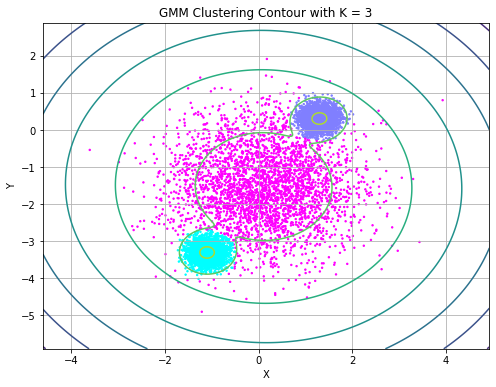

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Log scale: values of z <= 0 have been masked
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Log scale: values of z <= 0 have been masked


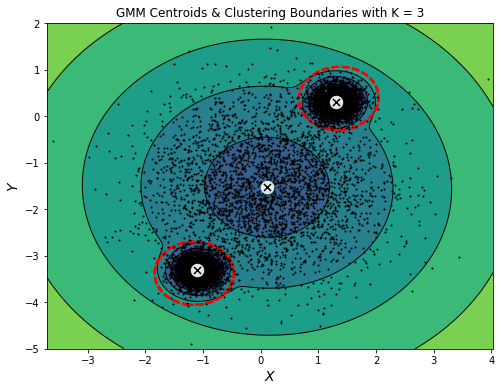

Run Time: 0.06368342240651449 mins 


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import time

from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)
    
    plt.title('GMM Centroids & Clustering Boundaries with K = '+ str(K))
    plt.xlabel("$X$", fontsize = 14)
    if show_ylabels:
        plt.ylabel("$Y$", fontsize = 14)
    else:
        plt.tick_params(labelleft = False)
        
#time start
time_start = time.time()

#---------------------------------------------------#
#HELPER FUNCTIONS

#load the data
data = np.load('data2D.npy')
#X = data[:,0]
#Y = data[:,1]

#----------------------------------------------------#
#MAIN LOOP

#show the initial data
#plt.plot(data[:,0], data[:,1], 'bx')
#plt.axis('equal')
#plt.show()

#estimate parameters of GMM with K = 3
#create GMM and run EM algorithm
K = 3

gmm = GaussianMixture(n_components = K, covariance_type = 'full')
gmm.fit(data)
labels = gmm.predict(data)

#GMM Parameters ----------------------------------#
print('GMM Weight Parameters:')
print(gmm.weights_)
print('\n')

print('GMM Mean Parameters:')
print(gmm.means_)
print('\n')

print('GMM Covariance Parameters:')
print(gmm.covariances_)
print('\n')

#probabilities; probabilistic cluster assignments

print('GMM Probabilities:')
probs = gmm.predict_proba(data)
print(probs)
print('\n')

#convergence statistics:
print('GMM Convergence:')
print(gmm.converged_)
print('\n')

print('GMM Number of Iterations Until Convergence:')
print(gmm.n_iter_)
print('\n')

#print(labels)
#print(labels.shape)

#plot cluster boundaries and points
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c = labels, s = 2, cmap = 'cool');
plt.title('GMM Clustering Contour with K = '+ str(K))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

#Plot Contours ----------------------------------------------#

#set d
h = 0.02

#calculate contours
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, h),
                   np.arange(y_min, y_max, h))

XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape(X.shape)

#plot contour
plt.contour(X, Y, Z)
plt.show()

#plot decision boundaries
plt.figure(figsize=(8, 6))
plot_gaussian_mixture(gmm, data)
plt.show()

time_stop = time.time()
print("Run Time: {} mins ".format((time_stop - time_start) / 60))




ANSWER:

In the boundary and contour plot above, we can see the 3 different data clusters as a result of GMM. Despite both being clustering methods, K-Means and GMM are different.

One major difference is the shape of the boundaries in each clustering method. In K-Means, the boundaries of the clusters have a much sharper and harder boundary. This is likely because K-Means uses hard assignments and assumes clusters as being spherical. This can lead to mis-groupings. On the other hand, GMM operates under soft assignments and has much more parameters than K-Means. 

This difference can be seen when looking at the GMM cluster shapes. They are much rounder, softer, and less rigid than the ones seen in K-Means.


Note: for plotting the boundaries, code from this tutorial below was used as a reference.

https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb?fbclid=IwAR2dG_e7e-K-zFYLjFRzSNUpO6mIF_5TKZz73r4RiNuS90vaqaejPf19zRI

Write a script that trains the Gaussian mixture model for the data set data2D.npy for $K=1,2,3,4,5$, and computes and plots the Bayesian Information Criterion (BIC) as a function of $K$.

In the markdown cell below, explain the BIC and what model size it suggests, and compare with your result for the K-Means algorithm above. 

GMM BIC:
BIC for K = 1: 59026.122541776545
BIC for K = 2: 52506.10106634447
BIC for K = 3: 34418.17559063957
BIC for K = 4: 34489.94877079206
BIC for K = 5: 34564.395048551436


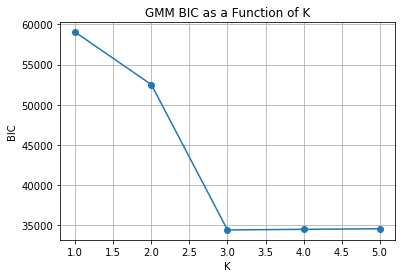

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

#load the data
data = np.load('data2D.npy')

#---------------------------------------------------#
#MAIN LOOP CALCULATIONS FOR K

gmm1 = GaussianMixture(n_components = 1, covariance_type = 'full')
gmm1.fit(data)
labels1 = gmm1.predict(data)
bic1 = gmm1.bic(data)
#score1 = gmm1.score(data) -> log likehood for the sample

gmm2 = GaussianMixture(n_components = 2, covariance_type = 'full')
gmm2.fit(data)
labels2 = gmm2.predict(data)
bic2 = gmm2.bic(data)

gmm3 = GaussianMixture(n_components = 3, covariance_type = 'full')
gmm3.fit(data)
labels3 = gmm3.predict(data)
bic3 = gmm3.bic(data)

gmm4 = GaussianMixture(n_components = 4, covariance_type = 'full')
gmm4.fit(data)
labels4 = gmm4.predict(data)
bic4 = gmm4.bic(data)

gmm5 = GaussianMixture(n_components = 5, covariance_type = 'full')
gmm5.fit(data)
labels5 = gmm5.predict(data)
bic5 = gmm5.bic(data)

#GMM BIC
print('GMM BIC:')
print ("BIC for K = 1: {}".format(bic1))
print ("BIC for K = 2: {}".format(bic2))
print ("BIC for K = 3: {}".format(bic3))
print ("BIC for K = 4: {}".format(bic4))
print ("BIC for K = 5: {}".format(bic5))

bicfunct = np.array([(1,bic1), (2,bic2), (3,bic3), (4,bic4), (5,bic5)])

plt.plot(bicfunct[:,0],bicfunct[:,1], '-o')
plt.title('GMM BIC as a Function of K')
plt.xlabel('K')
plt.ylabel('BIC')
plt.grid()
plt.show()


ANSWER:

Bayesian Information Criterion is an index used to help choose the more appropriate model when choosing among multiple models. It is defined by the following equation:

BIC = ln(n)*k - 2ln($ \hat L$)

Where:

- $ \hat L$ is the maximum value of the likelihood function of the model
- n is the number of data points in the data set
- k is the number of parameters estimated by the model

The model with the lowest BIC is preferred. In the data for the instance above, the lowest BIC is associated with the K = 3 GMM. Therefore, for this data, the suggested model is one with 3 clusters.

In comparison to the K-Means algorithm, we can contrast the GMM BIC and K-Means loss results in the table summary below:

|K | GMM BIC | K-MEANS LOSS |
|------|------|------|
|1 |   59026  | 18677|
|2 |   52506  | 7939|
|3 |   34418  | 5179|
|4 |   34489  | 4484|
|5 |   34541  | 4151|


What we can conclude from this is that for the same data, the suggested amount of clusters is different for each method when strictly looking at loss and BIC. For K-Means, the loss keeps on decreasing until K = 5 suggesting that the most accurate model is when there are 5 clusters. For GMM, the lowest BIC results when K = 3. After 3 clusters, the BIC increases slightly, suggesting that the models with more clusters are not better. This is very contrasting to K-Means's loss and highlights their differences in parameter quantity and hard vs. soft assignment methods. However, when using the gap statistic to evaluate K-Means, it suggests K = 3 is the most appropriate clustering. This correlates with what results from the BIC analysis of the GMM. 


Detailed numerical comparison:

GMM BIC:

BIC for K = 1: 59026.122541776545

BIC for K = 2: 52506.10106634447

BIC for K = 3: 34418.17360430714

BIC for K = 4: 34489.91369674641

BIC for K = 5: 34541.048803464735

K-Means Loss:

For K = 1: Loss = 18677.826945817906

For K = 2: Loss = 7939.074033585664

For K = 3: Loss = 5179.479871629681

For K = 4: Loss = 4484.770069515282

For K = 5: Loss = 4151.1024326555

Implement a script that runs both the K-Means and the Gaussian mixture learning algorithms on data100D.npy for $K = \{3,4,5,6,7,8\}$ and plots the K-Means loss and the BIC as a function of $K$, respectively. 
Include the plots in the markdown cell below, and discuss how many clusters you think are within the dataset and compare the learnt results of K-means and Mixture of Gaussian approach.

Remark: The Gaussian mixture learning may take some time to complete (10-30 mins).


GMM BIC:
BIC for K = 3: 1173743.954997234
BIC for K = 4: 1171921.6028565008
BIC for K = 5: 956994.0729544609
BIC for K = 6: 998297.6546781894
BIC for K = 7: 1038512.4974730283
BIC for K = 8: 1080862.9470690088


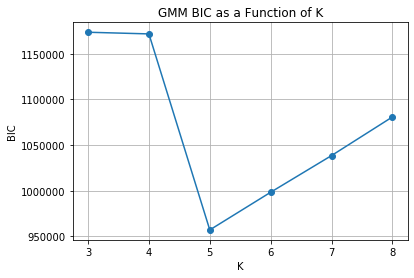

K-Means Loss:
For K = 3: Loss = 73274.484375
For K = 4: Loss = 57277.82421875
For K = 5: Loss = 42892.859375
For K = 6: Loss = 42720.765625
For K = 7: Loss = 42610.90625
For K = 8: Loss = 42535.14453125


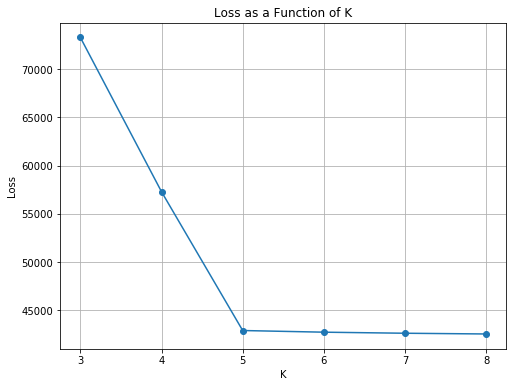

Run Time: 65.52755759557088 mins 


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import time

time_start = time.time()
#load the data
data = np.load('data100D.npy')

#---------------------------------------------------#
#MAIN LOOP CALCULATIONS FOR GMM
#"""
gmm3 = GaussianMixture(n_components = 3, covariance_type = 'full')
gmm3.fit(data)
labels3 = gmm3.predict(data)
bic3 = gmm3.bic(data)

gmm4 = GaussianMixture(n_components = 4, covariance_type = 'full')
gmm4.fit(data)
labels4 = gmm4.predict(data)
bic4 = gmm4.bic(data)

gmm5 = GaussianMixture(n_components = 5, covariance_type = 'full')
gmm5.fit(data)
labels5 = gmm5.predict(data)
bic5 = gmm5.bic(data)

gmm6 = GaussianMixture(n_components = 6, covariance_type = 'full')
gmm6.fit(data)
labels6 = gmm6.predict(data)
bic6 = gmm6.bic(data)

gmm7 = GaussianMixture(n_components = 7, covariance_type = 'full')
gmm7.fit(data)
labels7 = gmm7.predict(data)
bic7 = gmm7.bic(data)

gmm8 = GaussianMixture(n_components = 8, covariance_type = 'full')
gmm8.fit(data)
labels = gmm8.predict(data)
bic8 = gmm8.bic(data)

#GMM BIC
print('GMM BIC:')
print ("BIC for K = 3: {}".format(bic3))
print ("BIC for K = 4: {}".format(bic4))
print ("BIC for K = 5: {}".format(bic5))
print ("BIC for K = 6: {}".format(bic6))
print ("BIC for K = 7: {}".format(bic7))
print ("BIC for K = 8: {}".format(bic8))

bicfunct = np.array([(3,bic3), (4,bic4), (5,bic5), (6,bic6), (7,bic7), (8,bic8)])

plt.plot(bicfunct[:,0],bicfunct[:,1], '-o')
plt.title('GMM BIC as a Function of K')
plt.xlabel('K')
plt.ylabel('BIC')
plt.grid()

plt.show()
#"""
#total GMM BIC Run Time = 3.158487610022227mins

#CALCULATIONS FOR KMEANS --------------------------------------------
#USING SKLEARN##############################
#using sklearn for this section so the run time is shorter for debugging

"""
distortions = []
for i in range(3, 9):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=200,
        tol=1e-04, random_state=0
    )
    km.fit(data)
    distortions.append(km.inertia_)

print('K-Means Loss:')
print ("Loss for K = 3: {}".format(distortions[0]))
print ("Loss for K = 4: {}".format(distortions[1]))
print ("Loss for K = 5: {}".format(distortions[2]))
print ("Loss for K = 6: {}".format(distortions[3]))
print ("Loss for K = 7: {}".format(distortions[4]))
print ("Loss for K = 8: {}".format(distortions[5]))

# plot
plt.plot(range(3, 9), distortions, marker='o')
plt.title('K-Means Distortion as a Function of K')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid()

plt.show()
#"""
#Kmeans Run Time: 0.044302221139272055 mins 

#KMEANS WITHOUT SKLEARN##############################
#"""

#KMEANS & LOSS OUTPUTS ------------------------------------------
print('K-Means Loss:')

# K = 3
_, _, losses3 = Kmeans(data, 3)
print("For K = 3: Loss = {}".format((losses3)))

# K = 4
_, _, losses4 = Kmeans(data, 4)
print("For K = 4: Loss = {}".format((losses4)))

# K = 5
_, _, losses5 = Kmeans(data, 5)
print("For K = 5: Loss = {}".format((losses5)))

# K = 6
_, _, losses6 = Kmeans(data, 6)
print("For K = 6: Loss = {}".format((losses6)))

# K = 7
_, _, losses7 = Kmeans(data, 7)
print("For K = 7: Loss = {}".format((losses7)))

# K = 8
_, _, losses8 = Kmeans(data, 8)
print("For K = 8: Loss = {}".format((losses8)))


#LOSS PLOT ----------------------
plt.figure(figsize=(8, 6))
#plot data
lossfunct = np.array([(3,losses3), (4,losses4), (5,losses5), (6,losses6), (7,losses7), (8,losses8)])
plt.plot(lossfunct[:,0],lossfunct[:,1], '-o')
plt.title('Loss as a Function of K')
plt.xlabel('K')
plt.ylabel('Loss')
plt.grid()
plt.show()

#"""

#time stop
time_stop = time.time()

#print time it took
print("Run Time: {} mins ".format((time_stop - time_start) / 60))

Note: If running trying to run this code cell quickly, comment in the K-Means sklearn method and comment out the K-Means method without sklearn. Sklearn can be used to execute this code block's K-Means algorithm in place of the previously implemented K-Means algorithm from scratch in the previous section. 

The loss measurement is different as the plot is distortion as a function of K, but the general graph shape and trends were found to be the same during testing this code.

The computation time took around 65 mins without sklearn. Using sklearn made the code easier to debug and analyze the results with run time around 3 to 4 minutes. The from-scratch method is included in the code cell for running and was the most recently run version. The K-Means loss values without using sklearn are reported below.

Calculation Summary:


|K | GMM BIC | K-MEANS LOSS |
|------|------|------|
|3 |   1173743  | 73274|
|4 |   1171921  | 57277|
|5 |   956994  | 42892|
|6 |   998297 | 42720|
|7 |   1038512 | 42610|
|8 |   1080862  | 42535|


Analysis:

Using GMM, it seems that 5 clusters is optimal for the data set. This is due to the the GMM BIC calculation being the lowest for K = 5. The BIC sharply dips after K = 4 to K = 5 and has a steep rise again when K = 6. We can conclude that K = 5 is the optimal number of clusters for GMM with this data set.

For evaluating the K-Means algorithm, we can look at the total loss for the different K clusters. We can also use what is known as the elbow method. Here, we can look at the distortion for each K cluster and find the elbow point, which is an indicator of what K would be appropriate for the data set. In this case, the elbow point for the distortion graph is when K = 5 for the K-Means algorithm. This means that K = 5 provides an accurate clustering of the graph while not overfitting to be computationally expensive with relatively low loss decrease (K = 6, 7, 8). 

It seems both the GMM and K-Means algorithms converge on that K = 5 is most appropriate clustering for this data set. 

Detailed Calculations:

GMM BIC:
- BIC for K = 3: 1173743.954997234
- BIC for K = 4: 1171921.6028565008
- BIC for K = 5: 956994.0729544609
- BIC for K = 6: 998297.6546781894
- BIC for K = 7: 1038512.4974730283
- BIC for K = 8: 1080862.9470690088

K-Means Loss:
- For K = 3: Loss = 73274.484375
- For K = 4: Loss = 57277.82421875
- For K = 5: Loss = 42892.859375
- For K = 6: Loss = 42720.765625
- For K = 7: Loss = 42610.90625
- For K = 8: Loss = 42535.14453125

References:

Elbow Method: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html